# Problem 1



## Subproblem 1

$q_n = q_{n-1}

## Subproblem 2

# Problem 2

The basic axioms of probability are as follows:
1. $P(A) \geq 0$, for all $A \subset \Omega$
1. $P(\Omega) = 1$
1. If $A \cap B = \emptyset$ then $P(A\cup B) = P(A) + P(B)$

**Proposition 1**

Show that for any event A, $\mathbb{P}(A)=\sum_{i=1}^n \mathbb{P}\left(A \cap S_i\right)$

Let there be an event $A \subset \Omega$. If we break $\Omega$ into disjoint $S_1, S_2, ... S_n$, we find that $P(\Omega) = P(S_1 \cup S_2 \cup ... \cup S_n) = P(S_1) + P(S_2) + ... + P(S_n)$ as per the third axiom of probability.

Because A is a subset of $\Omega$, and therefore, all of A should be contained with the disjoint subsets $S_i$, we then find that $P(A \cap S_1) + P(A \cap S_2) + ... + P(A \cap S_n) = P(A \cap \Omega)$. We also know that $(A \cap \Omega) = P(A)$ because $P(\Omega) = 1$ per the second axiom of probability.

**Axiom 4**

I also here prove an additional axiom 4, where $P(A \cup B) = P(A) + P(B) - P(A \cap B)$ where A and B are events. This will be used later on.

We start with the definition of A union B, where $A \cup B = A \cup (A^c \cap B)$. We find that $P(A \cup B) = P(A) + P(A^c \cap B)$ using the third axiom because the two events are disjoint. Let this be result 1.

We also start with a second definition of B, where $B = (A \cap B) \cup (A^c \cap B)$ using the first proposition because $A^c$ and $A$ partition the sample space $\Omega$. Using the third axiom of probability, we know that $P(B) = P(A \cap B) + P(A^c \cap B)$ and can rearrange this such that $P(A^c \cap B) = P(B) - P(A \cap B)$. Let this be result 2.

We take the two results and find that:

Result 1: $P(A \cup B) = P(A) + P(A^c \cap B)$

Result 2: $P(A^c \cap B) = P(B) - P(A \cap B)$

Final equation: $P(A \cup B) = P(A) + P(B) - P(A \cap B)$

**Proposition 2**

Show that for events A, B, and C, $P(A) = \mathbb{P}(A \cap B)+\mathbb{P}(A \cap C)+\mathbb{P}\left(A \cap B^c \cap C^c\right)-\mathbb{P}(A \cap B \cap C)$.

We start with the probability of A. We can partition the sample space $\Omega$ into two disjoint subspaces: $B \cup C$ and $(B \cup C)^c = (B^c \cap C^c)$.

We can label $S_1 = B \cup C$ and $S_2 = B^c \cap C^c$. We then find that, using the proposition 1: 

$P(A) = P(A \cap (B \cup C)) + P(A \cap (B^c \cap C^c))$.

Furthermore, $P(B \cup C) = P(B) + P(C) - P(B \cap C)$ per axiom 4. Therefore, we can then expand the $P(A \cap (B \cup C))$ term as follows: $P(A \cap (B \cup C)) = P(A \cap B) + P(A \cap C) - P(A \cap B \cap C)$.

This gives us our final answer, where $P(A) = \mathbb{P}(A \cap B)+\mathbb{P}(A \cap C)+\mathbb{P}\left(A \cap B^c \cap C^c\right)-\mathbb{P}(A \cap B \cap C)$.

**Proposition 3**

We know that $P(A \cap B) = P(A) + P(B) - P(A \cap B)$ per axiom 4. We also know that $0 \leq P(A \cap B) \leq 1$ per the first and second axiomx of probability.

Therefore, we solve for the range of a possible $P(A \cap B)$ being between $P(A \cap B) = P(A) + P(B)$ or $P(A \cap B) = P(A) + P(B) - 1$.

Therefore, $P(A \cap B) \geq P(A) + P(B) - 1$ must be correct as it fits within this range.

**Proposition 4**



# Problem 3

## Subproblem 1

## Subproblem 2

# Problem 4

We write normally distributed x as $x = N(\mu, \Sigma)$. 

We aim to prove that $Ax + b = N(A\mu+b, A^2 * \Sigma)$ 



# Problem 5

In [72]:
pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
import jax.numpy as np
from jax import grad, jacfwd, jit, random, vmap
from jax.scipy.stats import multivariate_normal
from jax.tree_util import tree_map

from IPython.display import clear_output
import matplotlib.pyplot as plt
from einops import rearrange, reduce, repeat

In [74]:
def g1(x : np.array):
  return (x**3) - 6*(x**2) + 12*(x) - 8

def g2(x : np.array):
  return x + 1

def g1_inv(z : np.array):
  return np.cbrt(z) + 2

def g2_inv(z : np.array):
  return z - 1

In [90]:
# assuming input shape of (batch, 2)

# coeff3 = 1, coeff2 = 6, coeff1 = 12, coeff0 = 8

def g_fwd(x_pairs : np.array): # input size: (2)

  x1 = x_pairs[:,0]
  x2 = x_pairs[:,1]
  z1 = g1(x1)
  z2 = g2(x2)
  return np.column_stack((z1, z2))

def g_inv(z_pairs : np.array): 
  z1 = z_pairs[:,0]
  z2 = z_pairs[:,1]
  x1 = g1_inv(z1)
  x2 = g2_inv(z2)
  return np.column_stack((x1, x2))

g_inv_vec = vmap(g_inv, in_axes = (0, None))
g_fwd_vec = vmap(g_fwd, in_axes = (0, None))

In [76]:
key = random.PRNGKey(1)
z_pairs = random.normal(key, shape = (5000, 2))

x_pairs = g_inv(z_pairs)
x_pairs.shape

(5000, 2)

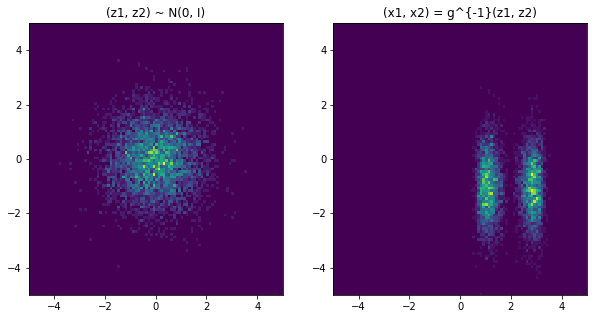

In [77]:
# Plotting for sanity check!

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist2d(z_pairs[:,0], z_pairs[:,1], bins=100, range=[(-5,5), (-5,5)], density=True)
ax1.set_xlim(-5, 5)
ax1.set_ylim(-5, 5)
ax1.set_title('(z1, z2) ~ N(0, I)')

ax2.hist2d(x_pairs[:,0], x_pairs[:,1], bins=100, range=[(-5,5), (-5,5)], density=True)
ax2.set_xlim(-5, 5)
ax2.set_ylim(-5, 5)
ax2.set_title('(x1, x2) = g^{-1}(z1, z2)')

plt.show()

We use the following equation to calculate the log-likelihood of (x1, x2) observations:

$\log p(\mathbf{x})=\log p(g(\mathbf{x}))+\log \left|\operatorname{det} J_{g(\mathbf{x})}\right|$

In [88]:
# Calculate log-likelihood of (x1, x2) observations

mu_z = np.zeros(2)
cov_z = np.eye(2)

# VMap definitions
J = jacfwd(g_fwd)
J_vec = vmap(J, (0, None), 0)
det_vec = vmap(np.linalg.det)

# \log p(x) from the change of variabled formula
print("log p(x) =", multivariate_normal.logpdf(g_fwd_vec(x_pairs), 
                                               mean=np.zeros(2), 
                                               cov=np.eye(2)) + 
                    np.log(np.abs(det_vec(J_vec(x_pairs)))))

ValueError: ignored